# CS4320 - Introduction to Machine Learning 

## Homework 2: Decision trees and machine learning fundamentals 

**Please type your name and A number here:**

In [1]:
Name = "Carter Watson"
assert Name != "", 'Please enter your name in the above quotation marks, thanks!'

A_number = "A02312565"
assert A_number != "", 'Please enter your A-number in the above quotation marks, thanks!'

credit = "https://chat.openai.com/share/413da153-0178-470b-af34-db69eec9f8c0"
assert credit != "", 'Please enter your link to chatgpt conversation in the above quotation marks, thanks!'

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.rcParams["font.size"] = 16

from sklearn.model_selection import cross_val_score, cross_validate, train_test_split
from sklearn.tree import DecisionTreeClassifier

## Introducing the data set
 
For this  assignment you'll be looking at Kaggle's [Spotify Song Attributes](https://www.kaggle.com/geomack/spotifyclassification/) dataset.
The dataset contains a number of features of songs from 2017 and a binary variable `target` that represents whether the user liked the song (encoded as 1) or not (encoded as 0). See the documentation of all the features [here](https://developer.spotify.com/documentation/web-api/reference/get-audio-features). 

This dataset is publicly available on Kaggle, and you will have to download it yourself. Follow the steps below to get the data CSV. 

1. If you do not have an account with [Kaggle](https://www.kaggle.com/), you will first need to create one (it's free).
2. Login to your account and [download](https://www.kaggle.com/geomack/spotifyclassification/download) the dataset.
3. Unzip the data file if needed, then rename it to `spotify.csv`, and move it to the same directory as this notebook.

## Exercise 1: Exploratory data analysis

rubric={points:30}

#### 1(a) 
rubric={points:2}

Read in the data CSV and store it as a pandas dataframe named `spotify_df`. The first column of the .csv file should be set as the index.

In [3]:
# read in csv # first col should be index
spotify_df = pd.read_csv('spotify.csv', index_col=0)

print(spotify_df.head()) # DEBUG

   acousticness  danceability  duration_ms  energy  instrumentalness  key  \
0        0.0102         0.833       204600   0.434          0.021900    2   
1        0.1990         0.743       326933   0.359          0.006110    1   
2        0.0344         0.838       185707   0.412          0.000234    2   
3        0.6040         0.494       199413   0.338          0.510000    5   
4        0.1800         0.678       392893   0.561          0.512000    5   

   liveness  loudness  mode  speechiness    tempo  time_signature  valence  \
0    0.1650    -8.795     1       0.4310  150.062             4.0    0.286   
1    0.1370   -10.401     1       0.0794  160.083             4.0    0.588   
2    0.1590    -7.148     1       0.2890   75.044             4.0    0.173   
3    0.0922   -15.236     1       0.0261   86.468             4.0    0.230   
4    0.4390   -11.648     0       0.0694  174.004             4.0    0.904   

   target      song_title            artist  
0       1        Mask 

#### 1(b)
rubric={points:2}

Run the following line of code to split the data. How many training and test examples do we have?

> Note: we are setting the `random_state` so that everyone has the same split on their assignments. This will make it easier for the TAs to grade.

In [4]:
# Do not modify this cell
df_train, df_test = train_test_split(spotify_df, test_size=0.25, random_state=123)

In [5]:
# Insert your code here (You need to print the number of training and testing examples)
print("Number of training examples:", len(df_train))
print("Number of testing examples:", len(df_test))


Number of training examples: 1512
Number of testing examples: 505


#### 1(c)
rubric={points:4}

- Print out the output of `describe()` **on the training split**. This will compute some summary statistics of the numeric columns.
- Which feature has the smallest range? 

> Hint: You can subtract the min value from the max value of the column to get the range.

Note that `describe` returns another DataFrame.

In [6]:
# describe data
train_described = df_train.describe()
print(train_described)

       acousticness  danceability    duration_ms       energy  \
count   1512.000000   1512.000000    1512.000000  1512.000000   
mean       0.185337      0.617565  247606.240741     0.682022   
std        0.257866      0.163086   81841.143743     0.211498   
min        0.000005      0.122000   16042.000000     0.014800   
25%        0.009460      0.512000  200072.000000     0.564000   
50%        0.063700      0.629500  230100.000000     0.713500   
75%        0.253000      0.738250  274041.750000     0.847250   
max        0.995000      0.984000  849960.000000     0.997000   

       instrumentalness          key     liveness     loudness         mode  \
count       1512.000000  1512.000000  1512.000000  1512.000000  1512.000000   
mean           0.139041     5.406746     0.189816    -7.089587     0.619048   
std            0.279536     3.635880     0.154115     3.841885     0.485782   
min            0.000000     0.000000     0.018800   -33.097000     0.000000   
25%            0.00

In [7]:
# iterate over columns, store smallest range
min_range = 999999999999;
for col in train_described.columns:
    max, min = train_described.loc[['max', 'min'], col]
    if min_range > max - min:
        min_range = max - min
print(min_range)


0.7928999999999999


#### 1(d) 
rubric={points:12}

Let's focus on the following features:

- danceability
- tempo
- energy
- valence

For each of these features (in order), produce a histogram that shows the distribution of the feature values in the training set, **separated for positive and negative examples**. 
By "positive examples" we mean target = 1 (user liked the song, positive sentiment) and by "negative examples" we mean target = 0 (used disliked the song, negative sentiment). As an example, here is what the histogram would look like for a different feature, loudness  

<img src="https://docs.google.com/uc?export=download&id=1aVT9lfAE0b6ju1aV3_gG_Dj5ZR2EJ-ri" alt="drawing" width="400"/>:



(You don't have to match all the details exactly, such as colour, but your histograms should look something like this, with a reasonable number of bins to see the shape of the distribution.) As shown above, there are two different histograms, one for target = 0 and one for target = 1, and they are overlaid on top of each other. The histogram above shows that extremely quiet songs tend to be disliked (more blue bars than orange on the left) and very loud songs also tend to be disliked (more blue than orange on the far right).

To adhere to the [DRY (Don't Repeat Yourself)](https://en.wikipedia.org/wiki/Don%27t_repeat_yourself) principle, make sure you use a `for` loop for your plotting, rather than repeating the plotting code 4 times. For this to work, I used `plt.show()` at the end of your loop, which draws the figure and resets the canvas for your next plot.

Here is some code that separates out the dataset into positive and negative examples, to help you get started:

In [8]:
# Do not modify the code  
negative_examples = df_train.query("target == 0")
positive_examples = df_train.query("target == 1")

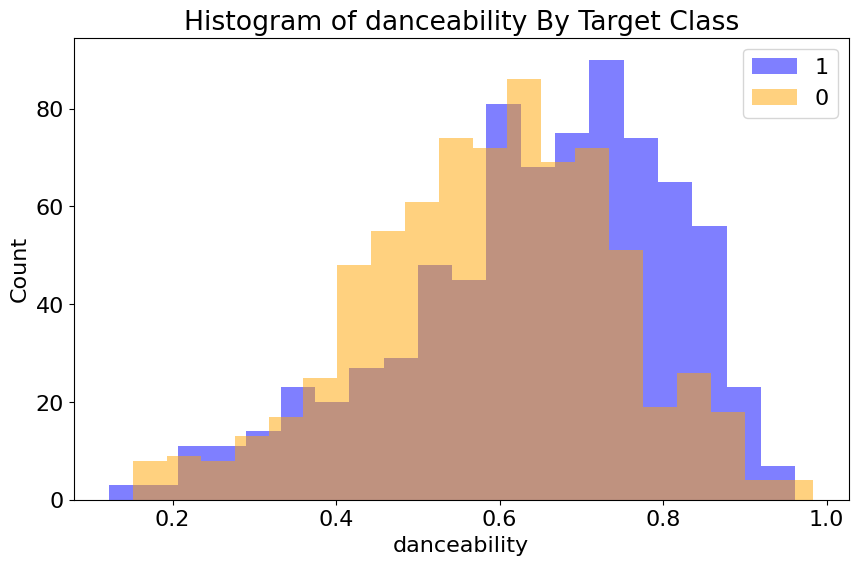

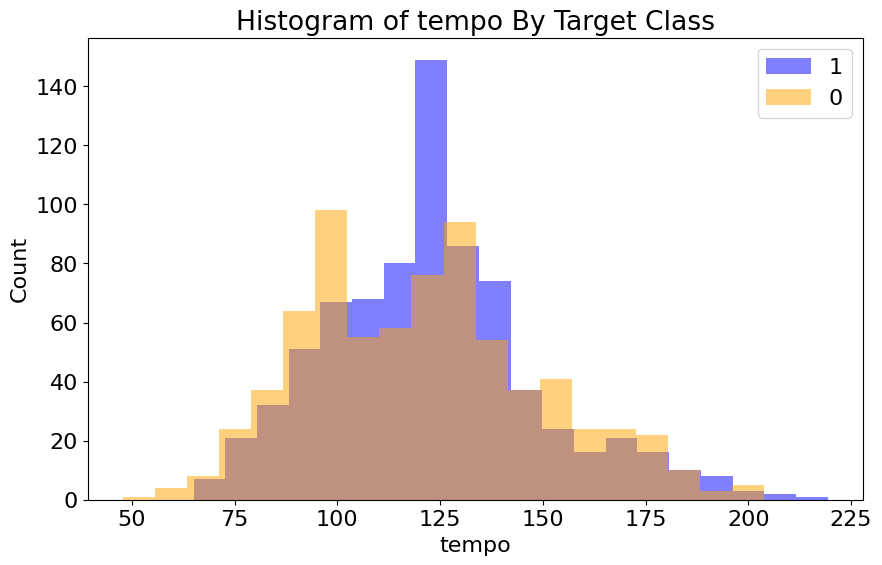

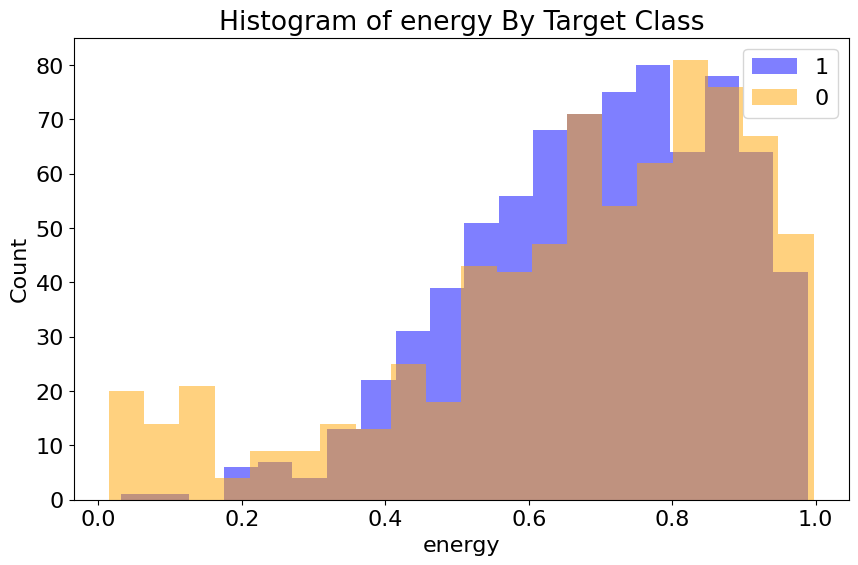

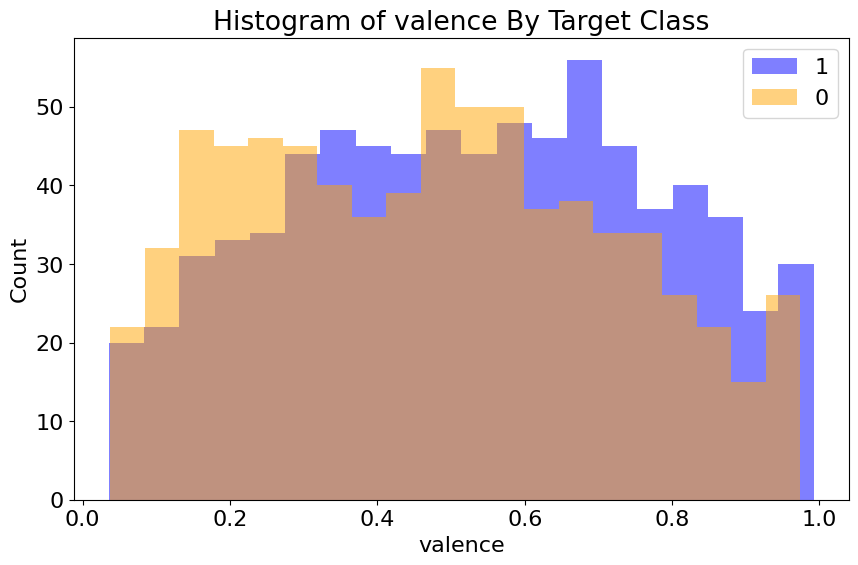

In [9]:
# Insert your code here
features = ['danceability', 'tempo', 'energy', 'valence',]# 'loudness'] # loudness for debug
for feature in features:
    # make graph
    plt.figure(figsize=(10, 6))
    plt.hist(positive_examples[feature], bins=20, alpha=0.5, label='1', color='blue')
    plt.hist(negative_examples[feature], bins=20, alpha=0.5, label='0', color='orange')

    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.legend(loc='upper right')
    plt.title(f'Histogram of {feature} By Target Class')
    plt.show()


#### 1(e)
rubric={points:4}

Let's say you had to make a decision stump (decision tree with depth 1), _by hand_, to predict the target class. Just from looking at the plots above, describe a reasonable split (feature name and threshold) and what class you would predict in the two cases. For example, in the loudness histogram provided earlier on, it seems that very large values of loudness are generally disliked (more blue on the right side of the histogram), so you might answer something like this: "A reasonable split would be to predict 0 if loudness > -5 (and predict 1 otherwise)."

Type your answer here:
A reasonable split would be to predict 1 if danceability > 0.68, otherwise predict zero


#### 1(f)
rubric={points:2}

Let's say that, for a particular feature, the histograms of that feature are identical for the two target classes. Does that mean the feature is not useful for predicting the target class?



Type your answer here:
The feature is not useful but it may be less useful without more data to see a larger trend.  It could also be useful in it's relevance/connection to other features.



#### 1(g) 
rubric={points:4}

Note that the dataset includes two free text features labeled `song_title` and `artist`:

In [10]:
df_train[["song_title", "artist"]].head()

,song_title,artist
1396,All in Vain,Mot
641,One of Those Nights,Juicy J
1765,Take Me As I Am,Wyclef Jean
1801,Save My Soul,JoJo
1624,Save the World - Radio Mix,Swedish House Mafia


- Do you think these features could be useful in predicting whether the user liked the song or not? 
- Would there be any difficulty in using them in your model?   

Type your answer here: 
Yes I think that they could be useful because users may tend to like to stick to one artist or a group of artists.  Also song titles can be indicative of the genre of the song.

There could be difficulty especially with the song title because you would have to run further analysis to determine what genre the song title may be indicative of, and it would likely not be very accurate


## Exercise 2: Using sklearn to build a decision tree classifier

Rubric={points:18}

#### 2(a) 
rubric={points:4}

- Create `X_train` and `y_train` and `X_test` and `y_test` from `df_train` and `df_test` above. Skip the `song_title` and `artist` features for now. 
- Fit a `DecisionTreeClassifier` on the train set.

In [11]:
# Define the features to be used (excluding 'song_title' and 'artist')
features_to_use = df_train.columns.difference(['song_title', 'artist'])
features_to_use = ['danceability', 'tempo', 'energy', 'valence',]

df_train_dropped = df_train.drop(['song_title', 'artist'], axis=1)
df_test_dropped = df_test.drop(['song_title', 'artist'], axis=1)

# Create X_train, y_train, X_test, and y_test
X_train = df_train_dropped[features_to_use]
y_train = df_train_dropped['target']

X_test = df_test_dropped[features_to_use]
y_test = df_test_dropped['target']

# Initialize and fit a DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=123)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=123)

#### 2(b)
rubric={points:2}

Use the `predict` method to predict the class of the first example in your `X_train`. Is the prediction correct? That is, does it match with the corresponding class in `y_train`?  

> Hint: you can grab the first example with `X_train.iloc[[0]]`.

In [12]:
first_example = X_train.iloc[[0]]  # Select the first example
predicted_class = clf.predict(first_example)

# Get the true class from y_train for the first example
true_class = y_train.iloc[0]

# Check if the prediction matches the true class
if predicted_class == true_class:
    print("The prediction is correct.")
else:
    print("The prediction is incorrect.")


The prediction is correct.


#### 2(c) 
rubric={points:2}

Use the `cross_val_score` function on your training set to compute the 10-fold cross-validation accuracy of your tree. 

In [13]:
# Perform 10-fold cross-validation and compute accuracy
cross_val_scores = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')

# Calculate the mean accuracy and standard deviation of the cross-validation scores
mean_accuracy = cross_val_scores.mean()
std_accuracy = cross_val_scores.std()

print(f"Mean Accuracy: {mean_accuracy:.2f}")
print(f"Standard Deviation: {std_accuracy:.2f}")

Mean Accuracy: 0.60
Standard Deviation: 0.03


#### 2(d)
rubric={points:6}

The above is useful, but we would like to see the training accuracy as well. 

- Compute the 10-fold cross-validation again but this time using the `cross_validate` function with `return_train_score=True`. 
- Print out both the cross-validation score and the training score.
- Is your cross-validation score exactly the same as what you got in the previous part? Very briefly discuss.

In [14]:
# Perform 10-fold cross-validation and compute scores
cv_results = cross_validate(clf, X_train, y_train, cv=10, scoring='accuracy', return_train_score=True)

# Extract cross-validation and training scores
cross_val_scores = cv_results['test_score']
train_scores = cv_results['train_score']

# Calculate the mean cross-validation and training scores
mean_cross_val_score = cross_val_scores.mean()
mean_train_score = train_scores.mean()

print(f"Cross-Validation Score: {mean_cross_val_score:.2f}")
print(f"Training Score: {mean_train_score:.2f}")

Cross-Validation Score: 0.60
Training Score: 1.00


Type the answer of third question here:
Yes cross-validation and mean are the same, it splits the data differently but the model is the same.

#### 2(e)
rubric={points:2}

Do you see a significant difference between the training score and the cross-validation score? Briefly discuss.

Type your answer here: 
Yes there is a significant difference between the cross-validation score and the training score.  This is likely a result of overfitting the model.



#### 2(f)
rubric={points:2}

Inspect the 10 sub-scores from the 10 folds of cross-validation. How does this inform the trustworthiness of your cross validation score?

In [15]:
# Perform 10-fold cross-validation and compute scores, including training scores
cv_results = cross_validate(clf, X_train, y_train, cv=10, scoring='accuracy', return_train_score=True)

# Extract cross-validation and training scores
cross_val_scores = cv_results['test_score']
train_scores = cv_results['train_score']

# Print the 10 sub-scores for cross-validation
print("Cross-Validation Sub-Scores:")
for fold_num, score in enumerate(cross_val_scores, start=1):
    print(f"Fold {fold_num}: {score:.2f}")

# Print the 10 sub-scores for training
print("\nTraining Sub-Scores:")
for fold_num, score in enumerate(train_scores, start=1):
    print(f"Fold {fold_num}: {score:.2f}")

Cross-Validation Sub-Scores:
Fold 1: 0.60
Fold 2: 0.54
Fold 3: 0.62
Fold 4: 0.64
Fold 5: 0.60
Fold 6: 0.60
Fold 7: 0.58
Fold 8: 0.64
Fold 9: 0.56
Fold 10: 0.59

Training Sub-Scores:
Fold 1: 1.00
Fold 2: 1.00
Fold 3: 1.00
Fold 4: 1.00
Fold 5: 1.00
Fold 6: 1.00
Fold 7: 1.00
Fold 8: 1.00
Fold 9: 1.00
Fold 10: 1.00


Type your answer here:
The scores are consistent meaning it's not heavily reliant on any particular split of data.
There are no outliers, and no pattern to be gleaned.

## Exercise 3: Hyperparameters 
rubric={points:32}

In this exercise, you'll experiment with the `max_depth` hyperparameter of the decision tree classifier. See the [`DecisionTreeClassifier` documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) for more details.

- Explore the `max_depth` hyperparameter. Run 10-fold cross-validation for trees with different values of `max_depth` (at least 10 different values in the range 1 to 25).{points:10}
- For each `max_depth`, get both the train accuracy and the cross-validation accuracy.{points:6}
- Make a plot with `max_depth` on the *x*-axis and the train and cross-validation scores on the *y*-axis. That is, your plot should have two curves, one for train and one for cross-validation. Include a legend to specify which is which.{points:6}
- Discuss how changing the `max_depth` hyperparameter affects the training and cross-validation accuracy. From these results, what depth would you pick as the optimal depth? {points:5}
- Do you think that the depth you chose would generalize to other "spotify" datasets (i.e., data on other spotify users)?{points:5}

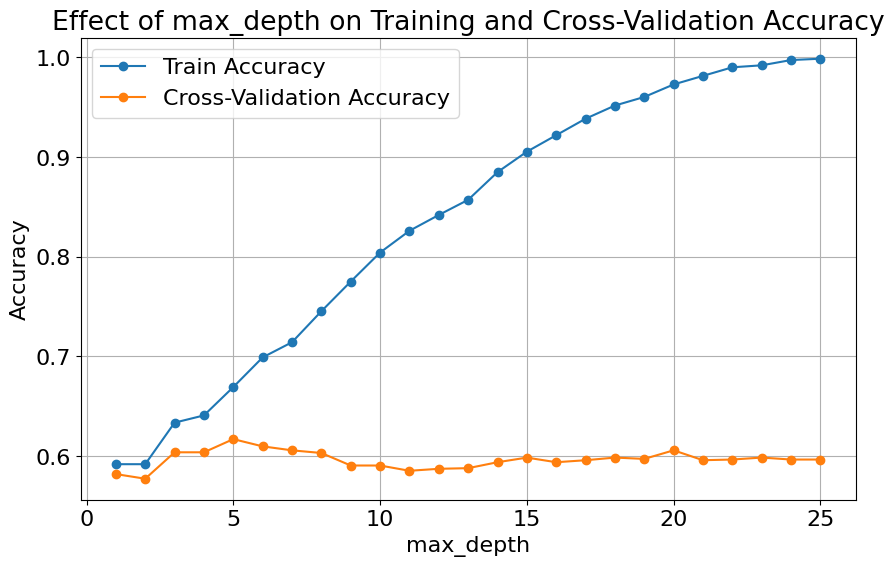

In [16]:
# Initialize lists to store train and cross-validation scores
train_scores = []
cross_val_scores = []

# Define a range of max_depth values to explore
max_depth_values = list(range(1, 26))

# Loop through different max_depth values
for max_depth in max_depth_values:
    # Create and fit a DecisionTreeClassifier with the current max_depth
    clf = DecisionTreeClassifier(max_depth=max_depth, random_state=123)
    clf.fit(X_train, y_train)
    
    # Compute and store training score
    train_score = clf.score(X_train, y_train)
    train_scores.append(train_score)
    
    # Perform 10-fold cross-validation and compute and store the mean cross-validation score
    cross_val_score_mean = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy').mean()
    cross_val_scores.append(cross_val_score_mean)

# Create a plot to visualize the effect of max_depth on training and cross-validation scores
plt.figure(figsize=(10, 6))
plt.plot(max_depth_values, train_scores, label='Train Accuracy', marker='o')
plt.plot(max_depth_values, cross_val_scores, label='Cross-Validation Accuracy', marker='o')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.title('Effect of max_depth on Training and Cross-Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

Type your answer here: The optimal max depth would be around 5.  this is the point were cross-validation accuracy is the highest without apparent overfitting to the training data.


## Exercise 4: Test set
rubric={points:12}

Remember the test set you created way back at the beginning of this assignment? Let's use it now to see if our cross-validation score from the previous exercise is trustworthy. 

- Select your favorite `max_depth` from the previous part.
- Train a decision tree classifier using that `max_depth` on the _entire training set_.
- Compute and display the test score. 
- How does it compare to the cross-validation score from the previous exercise? Briefly discuss. 

In [17]:
favorite_max_depth = 5  # Replace with your chosen max_depth

# Create and fit a DecisionTreeClassifier with the chosen max_depth on the entire training set
clf = DecisionTreeClassifier(max_depth=favorite_max_depth, random_state=123)
clf.fit(X_train, y_train)

# Compute and display the test score
test_score = clf.score(X_test, y_test)
print(f"Test Score with max_depth={favorite_max_depth}: {test_score:.2f}")

Test Score with max_depth=5: 0.61


Type the answer of forth question here:
The test score is very similar to the cross-validation score from the previous exercise at the same max_depth value.  This makes sense as I chose that value so as not be overfit so the similarities between the scores makes sense.



## Exercise 5: Conceptual questions
rubric={points:8}

Consider the dataset below, which has $6$ examples and $2$ features:

$$ X = \begin{bmatrix}5 & 2\\4 & 3\\  2 & 2\\ 10 & 10\\ 9 & -1\\ 9& 9\end{bmatrix}, \quad y = \begin{bmatrix}-1\\-1\\+1\\+1\\+1\\+1\end{bmatrix}.$$

1. Say we fit a decision stump (depth 1 decision tree) and the first split is on the first feature (left column) being less than 5.5. What would we predict in the "true" and "false" cases here?
2. What training accuracy would the above stump get on this data set?
3. Can we obtain 100% accuracy with a single decision stump in this particular example?

Type your answer here:

1. We would predict the the first three examples as being true and the last three as being false

2. It would get 5/6 correct, assuming -1 is true and +1 is false. If the true false is the other way around then the accuracy would be 1/6.

3. No, the first feature doesn't have anything that is able to be defined with only one split, and neither does the second.

## Submission instructions 

**PLEASE READ:** When you are ready to submit your assignment do the following:

1. Run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`.
2. Notebooks with cell execution numbers out of order will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
3. Please keep your notebook clean and delete any throwaway code.